<strong> Nom du groupe : *Votre nom de groupe*

| No d'étudiant    |      Nom      |    Prénom    |    Contribution                                  |
|:----------------:|:-------------:|:------------:|:-------------------------------------------------|
|  12345678        |  Hélène       | Aztakes      | Préparation des données                          |
|  09876543        |  Sarah-Kate   | Aykassée     | Widgets interactifs                              |

## Étape 1

In [815]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipywidgets import interact
#importez le module fonctions_fournies
import fonctions_fournies as ff




In [816]:
#ouvrez le fichier n_movies.csv
df = pd.read_csv('n_movies.csv')

#affichez les 5 premières lignes du dataframe
df.head(5)




,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [817]:

#Le titre et rating du film ayant le plus grand rating.
df[df['rating'] == df['rating'].max()][['title', 'rating']]

,title,rating
9444,BoJack Horseman,9.9


In [818]:
#Films ayant un rating > 9.0 triés par ordre de rating décroissant, et afficher titre, rating, et nombre de votes
df[df['rating'] > 9.0].sort_values(by='rating', ascending=False)[['title', 'rating', 'votes']]

,title,rating,votes
9444,BoJack Horseman,9.9,"16,066"
17,1899,9.6,853
8557,JoJo's Bizarre Adventure,9.6,"1,442"
8907,Avatar: The Last Airbender,9.6,"3,953"
8259,Dexter,9.6,"10,604"
...,...,...,...
8256,Dexter,9.1,"6,130"
9082,Rick and Morty,9.1,"9,861"
8269,Avatar: The Last Airbender,9.1,"4,257"
8512,Pose,9.1,769


In [819]:
#Les filmes sans rating
df[df['rating'].isnull()][['title', 'rating']]


,title,rating
55,Guillermo del Toro's Pinocchio,NaN
65,The School for Good and Evil,NaN
67,Wednesday,NaN
80,Mr. Harrigan's Phone,NaN
209,Luckiest Girl Alive,NaN
...,...,...
9752,Hey Duggee,NaN
9802,Hey Duggee,NaN
9813,Oni: Thunder God's Tale,NaN
9842,Hollywood Insider,NaN


## Étape 2

In [820]:
#change the column vote from string to int

def coma_filter(x):
    try:
        return x.replace(',', '')
    except:
        return x
    
#vote type is string
print(type(df['votes'][0]))

#get rid of ',' in the string
df['votes'] = df['votes'].apply(coma_filter)
df['votes'] = df['votes'].fillna(0).astype(int)

#vote type is int
print(type(df['votes'][0]))

df.head(5)


<class 'str'>
<class 'numpy.int32'>


,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413


In [821]:
#Le top 10 des films ayant les meilleurs votes
df.sort_values(by='votes', ascending=False)[['title', 'votes', 'rating', 'genre', 'year']]

,title,votes,rating,genre,year
9921,The Lord of the Rings: The Fellowship of the Ring,1844075,8.8,"Action, Adventure, Drama",(2001)
20,The Lord of the Rings: The Fellowship of the Ring,1844055,8.8,"Action, Adventure, Drama",(2001)
9951,Breaking Bad,1831359,9.5,"Crime, Drama, Thriller",(2008–2013)
7,Breaking Bad,1831340,9.5,"Crime, Drama, Thriller",(2008–2013)
57,The Lord of the Rings: The Return of the King,1819157,9.0,"Action, Adventure, Drama",(2003)
...,...,...,...,...,...
7547,Scarlet,0,NaN,"Adventure, Drama, Fantasy",(III)
7549,Untitled U2 Project,0,NaN,"Biography, Drama, Music",NaN
7550,The House of Spirit,0,NaN,"Documentary, Short",(2001)
7553,Free To Be You And Me,0,NaN,Family,(TV Movie)


In [822]:
#Ajouter une colonne release_year avec les années de sortie des films
df['release_year'] = df['year'].apply(ff.release_year)
df.head(5)

,title,year,certificate,duration,genre,rating,description,stars,votes,release_year
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031,2018
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885,2016
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384,2015
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773,2022
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413,2022


## Étape 3

In [823]:
# trouver la liste de tous les genres possibles
genres = set()
for genre in df['genre']:
    if type(genre) == str:
        genres.update(genre.replace(" ", "").split(','))
genres = list(genres)
genres.sort()
genres





['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [824]:
df["stars"].head(5)

0    ['Ralph Macchio, ', 'William Zabka, ', 'Courtn...
1    ['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...
2    ['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...
3    ['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...
4    ['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...
Name: stars, dtype: object

In [825]:
# simplifier le formatage de la liste des stars en supprimant les éléments suivants : unwanted = ["'","|","Stars:","Star:",'"',"[","]"]
#'Bob Odenkirk, ', 'Rhea Seehorn, ',
def simplify_stars(x):
    x = x.replace(" ", "")
    x = x.replace("'", "")
    x = x.replace(",,,", ", ")
    x = x.replace(",,", ", ")
    x = x.replace("|", "")
    x = x.replace("Stars:", "")
    x = x.replace("Star:", "")
    x = x.replace('"', "")
    x = x.replace("[", "")
    x = x.replace("]", "")
    return x
    
    
df['stars'] = df['stars'].apply(simplify_stars)



In [826]:
#top 10 des stars selon la moyenne des ratings des films dans lesquels elles ont joué

#créer un dictionnaire avec les stars et leurs ratings moyens
stars = {}
for i in range(len(df)):
    if type(df['stars'][i]) == str:
        for star in df['stars'][i].replace(" ", "").split(','):
            if star in stars:
                stars[star].append(df['rating'][i])
            else:
                stars[star] = [df['rating'][i]]

starsmore15 = stars.copy()
for star in list(stars.keys()):
    #retirer  les stars avec moins de 15 ratings et nan

    if len(starsmore15[star]) < 15 or np.isnan(np.mean(starsmore15[star])):
        del starsmore15[star]

    #calculer la moyenne des ratings pour chaque star
    else:
        starsmore15[star] = np.mean(starsmore15[star])

#trier le dictionnaire par ordre décroissant de rating moyen
starsmore15 = ff.sort_dict(starsmore15)

#afficher les 10 premiers éléments du dictionnaire
starsmore15 = dict(list(starsmore15.items())[0: 10])
starsmore15



{'JulieBenz': 8.766666666666666,
 'ErikKing': 8.766666666666666,
 'PaulF.Tompkins': 8.753333333333334,
 'MichaelaJillMurphy': 8.74074074074074,
 'JenniferCarpenter': 8.71923076923077,
 'AmySedaris': 8.588235294117647,
 'YuIn-sik': 8.5875,
 'AlisonBrie': 8.555555555555555,
 'MichaelC.Hall': 8.553571428571429,
 'KellenGoff': 8.520000000000001}

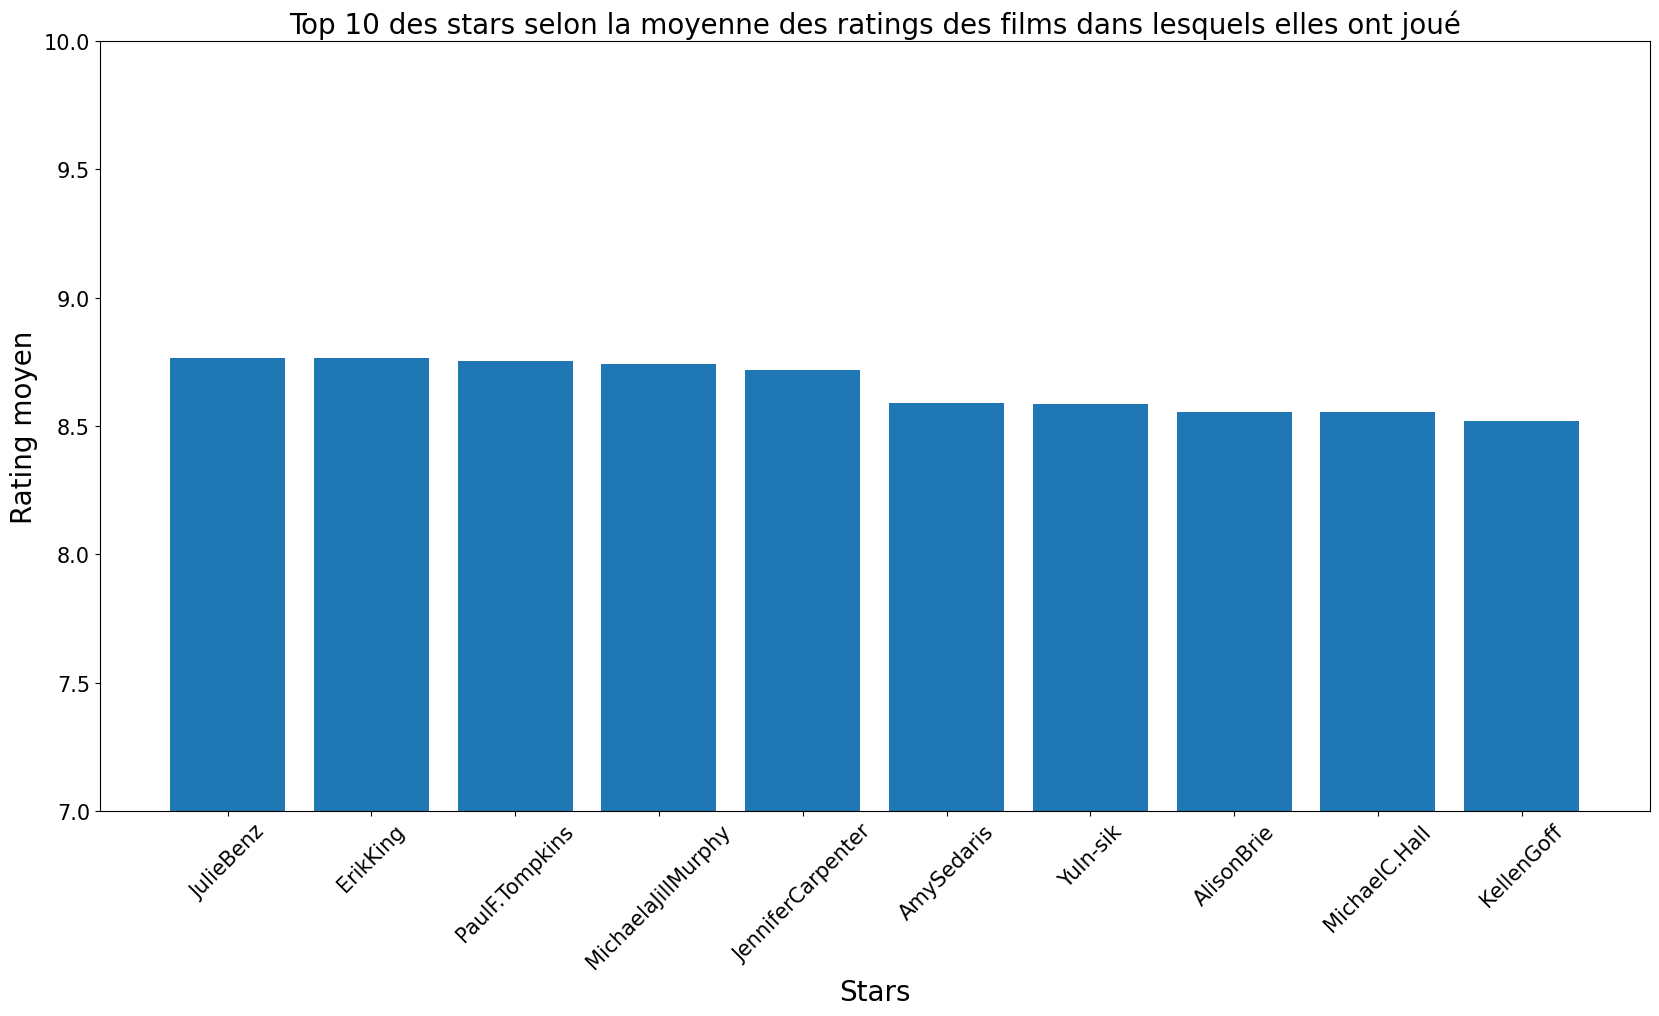

In [827]:
#graphique du top 10 des stars selon la moyenne des ratings des films dans lesquels elles ont joué. Y axis = rating moyen (10 max), X axis = stars
plt.figure(figsize=(20, 10))
plt.bar(starsmore15.keys(), starsmore15.values())
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Stars', fontsize=20)
plt.ylabel('Rating moyen', fontsize=20)
plt.ylim(7, 10)
plt.title('Top 10 des stars selon la moyenne des ratings des films dans lesquels elles ont joué', fontsize=20)
plt.show()



In [828]:
#Graphique interactif du top 10 des stars, pour une tranche d'années données (les années faisant partie de release_year), pour un certain genre (pris parmis tous les genre possibles) et avec au moins un nombre minimal de ratings.

#créer un widget pour choisir le genre
genre = widgets.Dropdown(
    options=genres,
    value='Action',
    description='Genre:',
    disabled=False,
)

#créer un widget pour choisir le nombre minimal de ratings
min_votes = widgets.IntSlider(
    value=25,
    min=0,
    max=25,
    step=1,
    description='nb_ratings:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

#créer un widget pour choisir la tranche d'années
year = widgets.IntRangeSlider(
    value=[1999, 2022],
    min=1932,
    max=2022,
    step=1,
    description='year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)



In [829]:
df['genre'].head(5)

0           Action, Comedy, Drama
1       Biography, Drama, History
2                    Crime, Drama
3          Drama, Horror, Mystery
4    Animation, Action, Adventure
Name: genre, dtype: object

In [830]:
#créer une fonction qui retourne le top 10 des stars, pour une tranche d'années données (les années faisant partie de release_year), pour un certain genre (pris parmis tous les genre possibles) et avec au moins un nombre minimal de ratings.
def top_stars(genre, min_votes, year):

    #créer un dictionnaire avec les stars et leurs ratings moyens
    selected_stars = {}
    for i in range(len(df)):
        if type(df['genre'][i]) == str and genre in df['genre'][i].replace(" ", "").split(',') and df['release_year'][i] in range(year[0], year[1]):
            for star in df['stars'][i].replace(" ", "").split(','):
                mean = np.mean(stars[star]) 
                if star not in selected_stars and len(stars[star]) >= min_votes and not np.isnan(mean):
                    selected_stars[star] = mean
                    

    #trier le dictionnaire par ordre décroissant de rating moyen
    selected_stars = ff.sort_dict(selected_stars)

    #afficher les 10 premiers éléments du dictionnaire
    selected_stars = dict(list(selected_stars.items())[0: 10])

    #graphique du top 10 des stars selon la moyenne des ratings des films dans lesquels elles ont joué. Y axis = rating moyen (10 max), X axis = stars

    plt.figure(figsize=(20, 10))
    plt.bar(selected_stars.keys(), selected_stars.values())
    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Stars', fontsize=20)
    plt.ylabel('Rating moyen', fontsize=20)
    plt.ylim(7, 10)
    plt.title('Top 10 des stars selon la moyenne des ratings des films dans lesquels elles ont joué', fontsize=20)
    plt.show()




    

In [831]:
interact(top_stars, genre=genre, min_votes=min_votes, year=year);

interactive(children=(Dropdown(description='Genre:', options=('Action', 'Adventure', 'Animation', 'Biography',…

In [832]:
df.head(5)


,title,year,certificate,duration,genre,rating,description,stars,votes,release_year
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"RalphMacchio, WilliamZabka, CourtneyHenggeler,...",177031,2018
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"ClaireFoy, OliviaColman, ImeldaStaunton, MattS...",199885,2016
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"BobOdenkirk, RheaSeehorn, JonathanBanks, Patri...",501384,2015
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"EmilyDeschanel, SamJaeger, GerardoCelasco, Mad...",9773,2022
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"ZachAguilar, KenichiroOhashi, EmiLo, AoiYûki",15413,2022
